## Лабораторная работа № 10. Оценка эффективности моделей бинарной классификации.
### (Валяев Георгий, ПИ20-6)

In [132]:
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from plotly.offline import iplot
from plotly.graph_objs import *
import plotly.subplots

### Задания для выполнения

##### 1. Загрузите данные о вероятности развития сердечного приступа.
Описание датасета смотрите здесь: [ссылка](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction).

In [17]:
dataframe = pd.read_csv('data/heart.csv')
dataframe

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [18]:
target = 'output'
y = dataframe[target]
x = dataframe.drop(target, axis=1)
x

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [19]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

##### 2. Разделите данные на обучающую и тестовую выборки в соотношении 80% / 20% без перемешивания.

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print("x_train shape:", x_train.shape)
print("y_train shape: {}".format(y_train.shape))

x_train shape: (242, 13)
y_train shape: (242,)


In [21]:
x_test

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
18,43,1,0,150,247,0,1,171,0,1.5,2,0,2
290,61,1,0,148,203,0,1,161,0,0.0,2,1,3
231,57,1,0,165,289,1,0,124,0,1.0,1,3,3
112,64,0,2,140,313,0,1,133,0,0.2,2,0,3
113,43,1,0,110,211,0,1,161,0,0.0,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,52,0,2,136,196,0,0,169,0,0.1,1,0,2
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3
225,70,1,0,145,174,0,1,125,1,2.6,0,0,3


In [22]:
x_train

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
247,66,1,1,160,246,0,1,120,1,0.0,1,3,1
81,45,1,1,128,308,0,0,170,0,0.0,2,0,2
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3
185,44,1,0,112,290,0,0,153,0,0.0,2,1,2
129,74,0,1,120,269,0,0,121,1,0.2,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,43,0,2,122,213,0,1,165,0,0.2,1,0,2
80,41,1,2,112,250,0,1,179,0,0.0,2,0,2
44,39,1,2,140,321,0,0,182,0,0.0,2,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2


##### 3. Постройте следующие модели классификации:
    1. случайное предсказание (подбрасывание кубика)
    2. логистическая регрессия (LogisticRegression);
    3. метод опорных векторов с линейным ядром (SVC(kernel='linear'));
    4. метод линейного дискриминантного анализа (LinearDiscriminantAnalysis)
    5. метод k ближайших соседей (KNeighborsClassifier с двумя классами).

###### 1) Случайное предсказание (подбрасывание кубика)

In [32]:
rnf = RandomForestClassifier()
rnf.fit(x_train, y_train)
y_pred = rnf.predict(x_test)
print(rnf.score(x, y))
print(metrics.accuracy_score(y_test, y_pred))

0.9603960396039604
0.8032786885245902


###### 2) Логистическая регрессия (LogisticRegression)

In [33]:
reg = LogisticRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
print(reg.score(x, y))
print(metrics.accuracy_score(y_test, y_pred))

0.834983498349835
0.7868852459016393


C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



###### 3) Метод опорных векторов с линейным ядром (SVC(kernel='linear'))

In [34]:
clf = SVC(kernel='linear', probability=True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(clf.score(x, y))
print(metrics.accuracy_score(y_test, y_pred))

0.8481848184818482
0.8032786885245902


###### 4) Метод линейного дискриминантного анализа (LinearDiscriminantAnalysis)

In [69]:
model = LinearDiscriminantAnalysis()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(model.score(x, y))
print(metrics.accuracy_score(y_test, y_pred))

0.8481848184818482
0.8032786885245902


###### 5) Метод k ближайших соседей (KNeighborsClassifier с двумя классами)

In [70]:
classier = KNeighborsClassifier(n_neighbors=2)
classier.fit(x_train, y_train)
y_pred = classier.predict(x_test)
print(classier.score(x, y))
print(metrics.accuracy_score(y_test, y_pred))

0.7557755775577558
0.5737704918032787


##### 4. На основе метрики  accuracy  сделайте вывод о недообученности-переобученности модели логистической регрессии. Для этого сделайте предсказание на тренировочном датасете и посчитайте accuracy на нём, затем на тестовом датасете и тоже посчитайте accuracy. Сравните эти значения, они должны быть примерно одинаковыми. Если точность на обучающей выборке оказывается сильно выше - это означает, что модель переобучилась.

In [37]:
y_pred_train = reg.predict(x_train)
print("Модель логистической регрессии\nМетрика accuracy на обучающей выборке: ", metrics.accuracy_score(y_train, y_pred_train))
y_pred_test = reg.predict(x_test)
print("Метрика accuracy на тестовой выборке: ", metrics.accuracy_score(y_test, y_pred_test))

Модель логистической регрессии
Метрика accuracy на обучающей выборке:  0.8471074380165289
Метрика accuracy на тестовой выборке:  0.7868852459016393


<div align="center" style="font-size: 17px">
    (Обучающая accuracy) 0,8471 > 0,7868 (Тестовая accuracy)
</div>

##### Показатели метрики accuracy обучающей выборки выше тестовой => модель логистической регрессии переобучилась!

##### 5. Сделайте вывод о применимости каждой модели на основе метрики  F1-score (чем выше её значение, тем модель эффективнее).

###### 1) Случайное предсказание (подбрасывание кубика)

In [39]:
y_pred = rnf.predict(x_test)
print(f"Среднее через micro метод: {round(metrics.f1_score(y_test, y_pred, average='micro'), 8)}")
print(f"Среднее через macro метод: {round(metrics.f1_score(y_test, y_pred, average='macro'), 8)}\n")
print(metrics.classification_report(y_test, y_pred))

Среднее через micro метод: 0.80327869
Среднее через macro метод: 0.80194805

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        33
           1       0.79      0.79      0.79        28

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



###### Учитывая показатель метрики точности (0,80) и достоверности предсказаний (0,80), можно говорить о хороших ожидаемых результатов применения этой модели на других реальных данных.

###### 2) Логистическая регрессия (LogisticRegression)

In [41]:
y_pred = reg.predict(x_test)
print(f"Среднее через micro метод: {round(metrics.f1_score(y_test, y_pred, average='micro'), 8)}")
print(f"Среднее через macro метод: {round(metrics.f1_score(y_test, y_pred, average='macro'), 8)}\n")
print(metrics.classification_report(y_test, y_pred))

Среднее через micro метод: 0.78688525
Среднее через macro метод: 0.78665591

              precision    recall  f1-score   support

           0       0.83      0.76      0.79        33
           1       0.74      0.82      0.78        28

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



###### С учётом интересных показателей метрик эффективности (precision = recall = accuracy = 0.79) и переобученности этой модели модель не стоит применять к реальным примерам набора данных в рамках практики.

###### 3) Метод опорных векторов с линейным ядром (SVC(kernel='linear'))

In [42]:
y_pred = clf.predict(x_test)
print(f"Среднее через micro метод: {round(metrics.f1_score(y_test, y_pred, average='micro'), 8)}")
print(f"Среднее через macro метод: {round(metrics.f1_score(y_test, y_pred, average='macro'), 8)}\n")
print(metrics.classification_report(y_test, y_pred))

Среднее через micro метод: 0.80327869
Среднее через macro метод: 0.80280172

              precision    recall  f1-score   support

           0       0.84      0.79      0.81        33
           1       0.77      0.82      0.79        28

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



###### Основываясь на метриках f1, стоит ожидать результатов работы этой модели на реальных данных на среднем уровне.

###### 4) Метод линейного дискриминантного анализа (LinearDiscriminantAnalysis)

In [43]:
y_pred = model.predict(x_test)
print(f"Среднее через micro метод: {round(metrics.f1_score(y_test, y_pred, average='micro'), 8)}")
print(f"Среднее через macro метод: {round(metrics.f1_score(y_test, y_pred, average='macro'), 8)}\n")
print(metrics.classification_report(y_test, y_pred))

Среднее через micro метод: 0.80327869
Среднее через macro метод: 0.80322581

              precision    recall  f1-score   support

           0       0.86      0.76      0.81        33
           1       0.75      0.86      0.80        28

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61



###### Отталкиваясь от полученных результатов, уже можно говорить о результатах среднего уровня работы этой модели в будущем на реальных данных.

###### 5) Метод k ближайших соседей (KNeighborsClassifier с двумя классами)

In [44]:
y_pred = classier.predict(x_test)
print(f"Среднее через micro метод: {round(metrics.f1_score(y_test, y_pred, average='micro'), 8)}")
print(f"Среднее через macro метод: {round(metrics.f1_score(y_test, y_pred, average='macro'), 8)}\n")
print(metrics.classification_report(y_test, y_pred))

Среднее через micro метод: 0.57377049
Среднее через macro метод: 0.56428571

              precision    recall  f1-score   support

           0       0.59      0.67      0.63        33
           1       0.54      0.46      0.50        28

    accuracy                           0.57        61
   macro avg       0.57      0.57      0.56        61
weighted avg       0.57      0.57      0.57        61



###### Опираясь на эти метрики, с 99%-ой уверенностью стоит говорить о неприменимости этой модели на реальных данных, поскольку даже точность почти близка к 60%.

##### 6. На одном графике постройте ROC-кривые для каждой модели. Визуально определите самую эффективную и наименее пригодную модели. Чем ROC-кривая выше, тем модель более эффективна.

In [71]:
preds_models = {
    "RandomForest": [rnf.predict(x_test), 'red', rnf.predict_proba(x_test)[:, 1]],
    "LogisticRegr": [reg.predict(x_test), 'orange', reg.predict_proba(x_test)[:, 1]],
    "SVC": [clf.predict(x_test), 'yellow', clf.predict_proba(x_test)[:, 1]],
    "LinearDiscAnal": [model.predict(x_test), 'green', model.predict_proba(x_test)[:, 1]],
    "KNeighborsClass": [classier.predict(x_test), 'blue', classier.predict_proba(x_test)[:, 1]]
}

preds_models

{'RandomForest': [array([1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
         1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
         0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1], dtype=int64),
  'red',
  array([0.88, 0.28, 0.08, 0.59, 0.52, 0.5 , 0.06, 0.07, 0.9 , 0.23, 0.69,
         0.72, 0.05, 0.94, 0.95, 0.96, 0.68, 0.63, 0.01, 0.14, 0.89, 0.18,
         0.72, 0.26, 0.32, 0.11, 0.83, 0.71, 0.21, 0.11, 0.95, 0.56, 0.07,
         0.95, 0.77, 0.86, 0.17, 0.84, 0.29, 0.16, 0.41, 0.1 , 0.89, 0.47,
         0.45, 0.5 , 0.6 , 0.34, 0.9 , 0.06, 0.59, 0.02, 0.1 , 0.01, 0.4 ,
         0.79, 0.95, 0.01, 0.4 , 0.15, 0.66])],
 'LogisticRegr': [array([1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
         1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
         1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1], dtype=int64),
  'orange',
  array([5.77690960e-01, 5.88153230e-01, 4.95581297e-03, 8.73707040e-01,
 

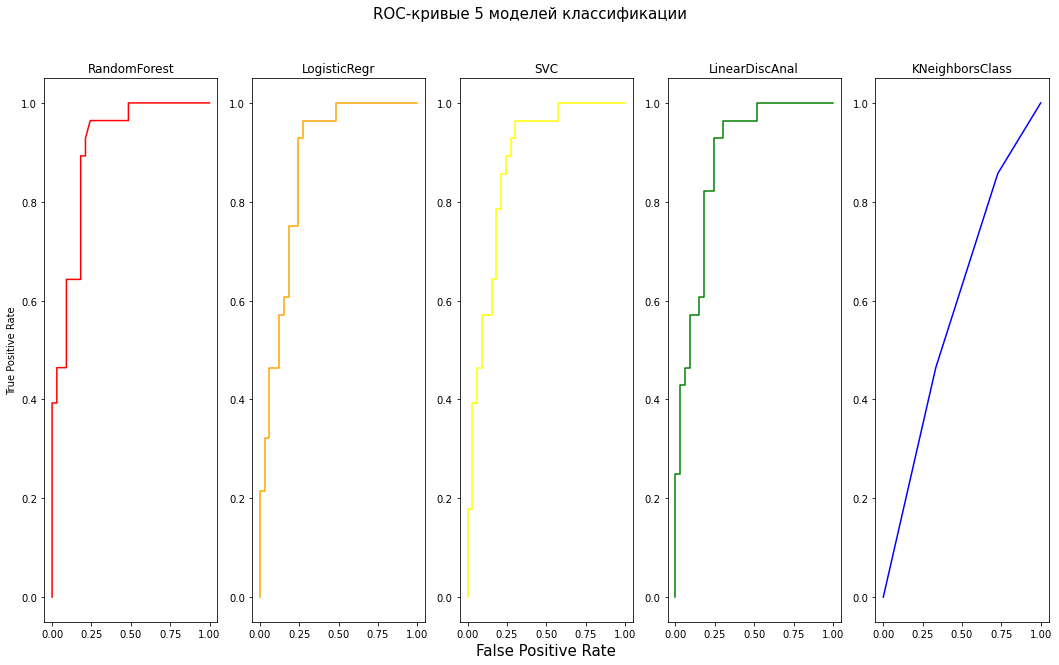

In [72]:
fig, axes = plt.subplots(1, 5, figsize=(18, 10))
models, counter = list(preds_models.keys()), 0
for ax in axes:
    fpr, tpr, treshold = metrics.roc_curve(y_test, preds_models[models[counter]][2])
    ax.plot(fpr, tpr, preds_models[models[counter]][1])
    ax.set_title(models[counter])
    counter += 1

ax = axes[2]
ax.set_xlabel("False Positive Rate", fontsize=15)
ax = axes[0]
ax.set_ylabel("True Positive Rate")

fig.suptitle("ROC-кривые 5 моделей классификации", fontsize=15)
plt.show()

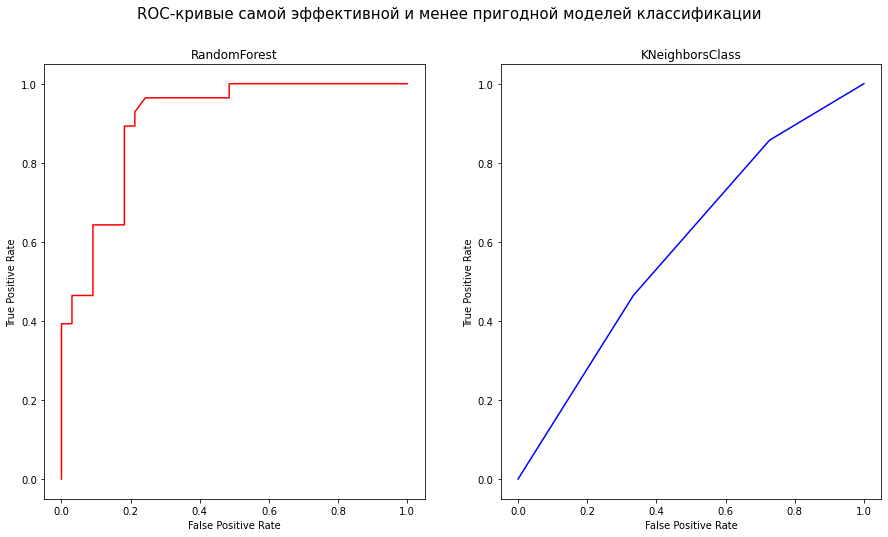

In [73]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
models, counter = list(preds_models.keys())[0:5:4], 0
for ax in axes:
    fpr, tpr, treshold = metrics.roc_curve(y_test, preds_models[models[counter]][2])
    ax.plot(fpr, tpr, preds_models[models[counter]][1])
    ax.set_title(models[counter])
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    counter += 1

fig.suptitle("ROC-кривые самой эффективной и менее пригодной моделей классификации", fontsize=15)
plt.show()

In [129]:
def plot_roc_curve_good_bad(total):
    index_graphs = list(total.keys())
    figure = plotly.subplots.make_subplots(rows=1, cols=2, subplot_titles=tuple(total.keys()), print_grid=False)
    figure.append_trace(Scatter(
        x=total[index_graphs[0]][0], y=total[index_graphs[0]][1],
        mode='lines', name=index_graphs[0], line=dict(color=total[index_graphs[0]][2])), 1, 1)
    figure.append_trace(Scatter(
        x=total[index_graphs[1]][0], y=total[index_graphs[1]][1],
        mode='lines', name=index_graphs[1], line=dict(color=total[index_graphs[1]][2])), 1, 2)
    figure['layout']['annotations'][0]['font']['size'] = 14
    figure['layout']['annotations'][1]['font']['size'] = 14
    figure['layout']['xaxis1'].update(title='False Positive Rate')
    figure['layout']['xaxis2'].update(title='False Positive Rate')
    figure['layout']['yaxis1'].update(title='True Positive Rate')
    figure['layout']['yaxis2'].update(title='True Positive Rate')
    figure['layout'].update(height=400, width=900, showlegend=True, title_text='ROC-кривые самой эффективной и менее пригодной моделей классификации')
    iplot(figure)

In [130]:
graphs_mod_plotly = {
    models[0]: list(metrics.roc_curve(y_test, preds_models[models[0]][2])[0:2]) + [preds_models[models[0]][1]],
    models[1]: list(metrics.roc_curve(y_test, preds_models[models[1]][2])[0:2]) + [preds_models[models[1]][1]]
}
graphs_mod_plotly

{'RandomForest': [array([0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.03030303, 0.03030303, 0.09090909, 0.09090909,
         0.09090909, 0.18181818, 0.18181818, 0.18181818, 0.18181818,
         0.18181818, 0.21212121, 0.21212121, 0.24242424, 0.48484848,
         0.48484848, 0.57575758, 0.6969697 , 0.72727273, 0.84848485,
         0.90909091, 1.        ]),
  array([0.        , 0.03571429, 0.17857143, 0.21428571, 0.35714286,
         0.39285714, 0.39285714, 0.46428571, 0.46428571, 0.53571429,
         0.64285714, 0.64285714, 0.71428571, 0.78571429, 0.85714286,
         0.89285714, 0.89285714, 0.92857143, 0.96428571, 0.96428571,
         1.        , 1.        , 1.        , 1.        , 1.        ,
         1.        , 1.        ]),
  'red'],
 'KNeighborsClass': [array([0.        , 0.33333333, 0.72727273, 1.        ]),
  array([0.        , 0.46428571, 0.85714286, 1.        ]),
  'blue']}

In [131]:
plot_roc_curve_good_bad(graphs_mod_plotly)

##### 7. Выведите соответствующие значения AUC (площадь под ROC - кривой) и расположите модели в порядке пригодности.

In [47]:
dict_auc = {}
for key in preds_models.keys():
    fpr, tpr, treshold = metrics.roc_curve(y_test, preds_models[key][2])
    dict_auc[key] = metrics.auc(fpr, tpr)
    print(f"Модель {key} => значение AUC = {dict_auc[key]}.\n")

Модель RandomForest => значение AUC = 0.9031385281385281.

Модель LogisticRegr => значение AUC = 0.8733766233766234.

Модель SVC => значение AUC = 0.8777056277056277.

Модель LinearDiscAnal => значение AUC = 0.8831168831168832.

Модель KNeighborsClass => значение AUC = 0.5909090909090908.



In [48]:
dict_auc

{'RandomForest': 0.9031385281385281,
 'LogisticRegr': 0.8733766233766234,
 'SVC': 0.8777056277056277,
 'LinearDiscAnal': 0.8831168831168832,
 'KNeighborsClass': 0.5909090909090908}

In [49]:
sorted_dict_auc = dict(sorted(dict_auc.items(), key=lambda item: -item[1]))
for model, value in sorted_dict_auc.items():
    print(f'Модель {model} пригодна для дальнейшего применения на реальных данных на {round(value * 100, 4)}%\n')

Модель RandomForest пригодна для дальнейшего применения на реальных данных на 90.3139%

Модель LinearDiscAnal пригодна для дальнейшего применения на реальных данных на 88.3117%

Модель SVC пригодна для дальнейшего применения на реальных данных на 87.7706%

Модель LogisticRegr пригодна для дальнейшего применения на реальных данных на 87.3377%

Модель KNeighborsClass пригодна для дальнейшего применения на реальных данных на 59.0909%

